# Customer Segmentation

The goal of this project is to assist us in better understanding customer behavior in a mall through membership cards. The data includes basic information about customers such as their ID, age, gender, annual income, and spending score. Customers are assigned a spending score based on their purchasing data. To do so, we use an unsupervised ML technique known as the KMeans clustering algorithm to group the customers. By better understanding its customers, the mall can design its marketing approach to boost its revenue.



## Exploratory Data Analysis

In [26]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
## Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [2]:
## Import Dataset

df_customers = pd.read_csv("Mall_Customers.csv")
df_customers


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
## Change Gender Variable to Numeric

df_customers["Gender"].replace(["Male","Female"], [0, 1], inplace = True) # 0 : male, 1 : female

In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


## Description of the dataset

There are five variables (CustomerID, Gender, Age, Income and Spending Score) in our dataset for 200 customers observed. Each variable provide basic information about the customers.
- CustomerID: A unique ID assigned to each customer. 
- Gender: Gender of the customer. Catergorical (0: Male, 1: Female)
- Age: Age of the customer
- Annual Income: Annual income of the customer in dollars.
- Spending Score: Score assigned by the mall based on customer behavior and spending nature.

In [6]:

df_customers.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


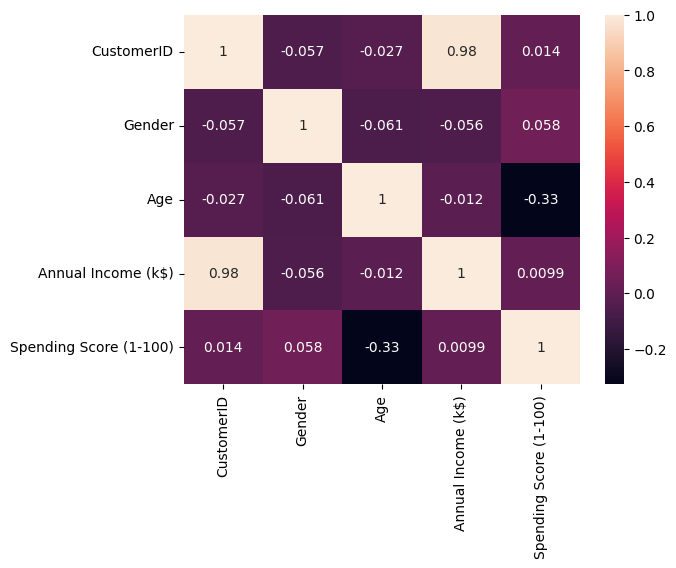

In [7]:
## Correlation of variables

plt.figure()
s = sns.heatmap(df_customers.corr(),
                annot = True,
                cmap = "rocket")
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

From the above correlation plot, we can see that the correlations between most of the variables are almost negligible. There is a low negative correlation between age and spending score, and a very high correlation between customerID and annual income. Let's analyze these two relationships with the help of the scatter plot.

Text(0, 0.5, 'Spending Score (1-100)')

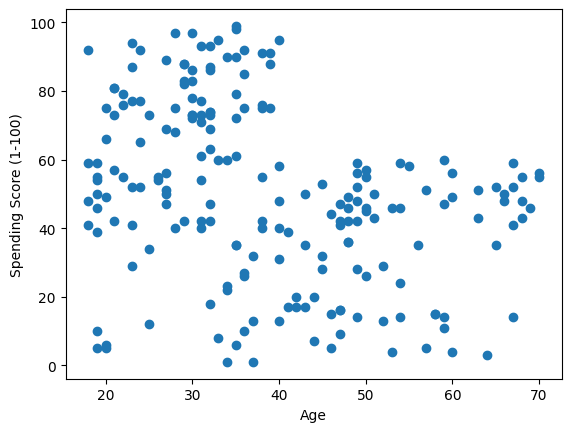

In [8]:
## Relationship between age and spending score.

plt.scatter(df_customers["Age"], df_customers["Spending Score (1-100)"])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

From the above plot, we can see that customers who are older than 40 tend to spend less and have a lower spending score as compared to those younger than 40. Spending declines with age, which is why there is a negative correlation coefficient between age and spending score.

Text(0, 0.5, 'Annual Income (k$)')

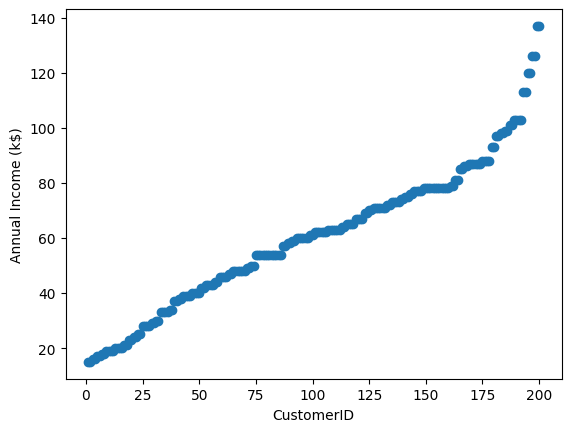

In [9]:
## Relationship between customerID and annual income.

plt.scatter(df_customers["CustomerID"], df_customers["Annual Income (k$)"])
plt.xlabel("CustomerID")
plt.ylabel("Annual Income (k$)")

The plot above shows that customerID increases with annual income of customers. There is a very strong correlation between the two variables. However, there is no causal relationship between the two variables. Hence, it's a spurious correlation. CustomerID is just a unique identifier for each customer in our dataset. 

We use only three variables for the rest of our analysis. Age, annual income and spending score.

In [10]:
X = df_customers[["Age", "Annual Income (k$)", "Spending Score (1-100)" ]].values

## Data Preprocessing

Machine learning algorithms such as the gradient based methods (linear regression, logistic regression, principal component analysis, neural networks, etc.) and distance-based methods (KNN, K-means clustering, and support vector machines) require data to be scaled. Scaling involves converting values of each variable so that they are all on a similar numerical scale. Since we want to preserve the relationships between datapoints, we use standardized data is used for the analysis. Here's the formula for standardization:
$$X' = \frac{X-\mu}{\sigma}$$


In [11]:
## Standardize Dataset

scaler = StandardScaler()
X_std = scaler.fit_transform(X) # scaled data

## Customer Segmentation with K-Means Clustering

 K-means is a simple unsupervised learning algorithm for clustering. With K-Means clustering we can detect patterns in our dataset and group together similar data points.<br>
 Our goal is to assign each data point to a cluster. Nearby points should be assigned to the same cluster. Formally, the task of clustering is to take a set of points as input and return a partitioning of the points into K clusters. <br>
 
 <u> [Algorithm](https://people.csail.mit.edu/dsontag/courses/ml12/slides/lecture14.pdf)</u> <br>
 Step 1: Pick $K$ random points as cluster centers (or means). <br>
 Step 2: Assign data points to closest cluster center. Then change the cluster center to the average of its assigned points. <br>
 Step 3: Repeat step 2 until convergence.

### Picking the right K

With this algorithm, you have to decide beforehand how many clusters you expect to create. We pick the right K using the [elbow method](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjutZXR5tf-AhWLFTQIHY25D0oQFnoECCUQAQ&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FElbow_method_(clustering)&usg=AOvVaw2dw5Rh9IylOxRamuC20AFT). Another metric is the silhouette score. This is a measure of how similar a data point is within a cluster (cohesion) compared to other clusters (separation). Pick the number of clusters, or K, with the silhouette score closest to 1.

For n_clusters = 2, the average silhouette score is : 0.34
For n_clusters = 3, the average silhouette score is : 0.35
For n_clusters = 4, the average silhouette score is : 0.34
For n_clusters = 5, the average silhouette score is : 0.42
For n_clusters = 6, the average silhouette score is : 0.38
For n_clusters = 7, the average silhouette score is : 0.37
For n_clusters = 8, the average silhouette score is : 0.41
For n_clusters = 9, the average silhouette score is : 0.39
For n_clusters = 10, the average silhouette score is : 0.35


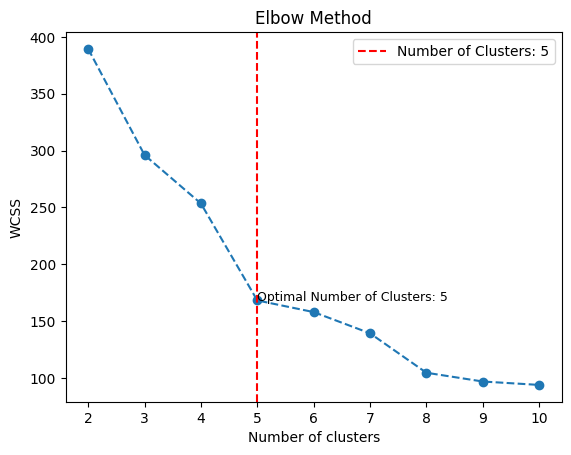

In [12]:
## Use the elbow method to find the optimal number of clusters

import numpy as np

results = [] # Within cluster sum of squares (WCSS)
s_avg = [] # Silhouette score

for i in range(2,11):
    k_means = KMeans(n_clusters = i, init = "k-means++", n_init = "auto", random_state = 42)
    k_means.fit(X_std)
    results.append(k_means.inertia_)
    
    #cluster_labels = kmeans.fit_predict(X_std)
    silhouette_avg = silhouette_score(X_std, k_means.labels_)
    s_avg.append(silhouette_avg)

    print(f'For n_clusters = {i}, the average silhouette score is : {round(silhouette_avg, 2)}')

plt.plot(range(2, 11), results, marker = 'o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Add a vertical line indicating the number of clusters
n_clusters = 5
plt.axvline(x=n_clusters, linestyle='--', color='red', label=f'Number of Clusters: {n_clusters}')
plt.annotate(f'Optimal Number of Clusters: {n_clusters}', xy=(n_clusters, results[np.argmax(s_avg)]),fontsize=9)
plt.legend()
plt.show()

Both the elbow method and silhouette score agree on 5 clusters as  the optimal number of clusters.

In [13]:
k_means = KMeans(n_clusters=5, init='k-means++', n_init = "auto", max_iter=100, tol=0.01, random_state=0)
k_means.fit(X_std)

KMeans(max_iter=100, n_clusters=5, n_init='auto', random_state=0, tol=0.01)

In [14]:
## We create a new data frame with the original features and add a new column with the assigned clusters for each point.

X_kmeans = df_customers[["Age", "Annual Income (k$)", "Spending Score (1-100)" ]].copy()
X_kmeans["Clusters"] = k_means.labels_
centroids = k_means.cluster_centers_

In [15]:
## Calculate mean values for the clusters

X_analysis = X_kmeans.groupby(["Clusters"]).mean()
X_analysis

,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,
0,39.871795,86.102564,19.358974
1,55.638298,54.382979,48.851064
2,25.185185,41.092593,62.240741
3,46.250000,26.750000,18.350000
4,32.875000,86.100000,81.525000


#### Interpretation of Segmentation

We can see what each cluster represents by analyzing the clusters.

- Cluster 0 customers are mostly in their late 30s, have high incomes, but spend less frequently as they have a low spending score (LS).
- Cluster 1 customers are mostly in the 50s, have moderate incomes, and spend frequently.
- Cluster 2 customers are mostly in their 20s, have moderate incomes, and spend very frequently.
- Cluster 3 customers are mostly in their 40s, have low incomes, and spend less frequently.
- Cluster 4 customers are mostly in their 30s, have high incomes, and spend the most frequently as they have a very high spending score (HS).

In [16]:
# Compute the size and proportions of the five clusters

X_analysis["No. of Obs"] = X_kmeans.groupby(['Clusters']).size()
X_analysis['Proportion of Obs'] = X_analysis['No. of Obs'] / X_analysis['No. of Obs'].sum()
#X_analysis[['Age', 'Annual Income (k$)']]

In [17]:
X_analysis = X_analysis.rename({0: "Middle-Aged High Income LS",
                   1: "Senior Moderate Income",
                   2: "Young Adult Moderate Income ",
                   3: "Middle-Aged Low Income",
                   4: "Middle-Aged High Income HS"})

In [18]:
## Add labels to the different segments.

X_kmeans["Labels"] = X_kmeans["Clusters"].map({
                   0: "Middle-Aged High Income LS",
                   1: "Senior Moderate Income",
                   2: "Young Moderate Income",
                   3: "Middle-Aged Low Income",
                   4: "Middle-Aged High Income HS" })

In [25]:
## 3D scatter plot to how the 5 different clusters.

fig = px.scatter_3d(X_kmeans, x = "Age", y = "Annual Income (k$)", z = "Spending Score (1-100)", color="Labels",
              symbol="Labels", opacity=0.7, size_max=20, title = "Mall Customer Segmentation")

fig.show()

In [22]:
## We can to see number of customer per cluster and their spending score

fig = px.bar(X_analysis, x = X_analysis.index, y = X_analysis["No. of Obs"],
              color=X_analysis["Spending Score (1-100)"],
             labels={"No. of Obs":"Customers"}, height=400)

fig.show()

In [23]:
plt.figure(figsize=(9, 6))
fig = px.scatter(X_kmeans,
    x = "Age",
    y = "Annual Income (k$)",
    color = X_kmeans["Labels"],
    size = X_kmeans["Annual Income (k$)"]
)

fig.show()

<Figure size 900x600 with 0 Axes>

# Acknowledgement

Dataset Source: [Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python) 